<a href="https://colab.research.google.com/github/Sid-2862/Titanic-ML-Competition-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Competiton

# Importing All The Necessary Libraries

In [20]:
# To avoid the unnecessary warning
from warnings import filterwarnings
filterwarnings("ignore")

# to read the data
import pandas as pd
import numpy as np

# Data Preprocessing & Data Cleaning
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# train Test split
from sklearn.model_selection import train_test_split

# models Required
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import f1_score,classification_report,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

# Reading The Data and performing Basic quality checks

In [21]:
url1 = r'https://raw.githubusercontent.com/Sid-2862/Titanic-ML-Competition-/refs/heads/main/train.csv'
df = pd.read_csv(url1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
s = df.isna().sum()
s[s>0]

,0
Age,177
Cabin,687
Embarked,2


In [24]:
df.duplicated().sum()

np.int64(0)

# There are no duplicated values

# Separate x and y features

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
x = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
y = df[['Survived']]

In [27]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [28]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Data Preprocessing & Data Cleaning

In [29]:
cat = list(x.columns[x.dtypes == "object"])
con = list(x.columns[x.dtypes != "object"])

In [30]:
cat

['Sex', 'Embarked']

In [31]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [32]:
con_pipe = make_pipeline(SimpleImputer(strategy="mean"),StandardScaler())

In [33]:
cat_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(
    handle_unknown = "ignore",
    sparse_output = False,
))

In [34]:
pre = ColumnTransformer([("cat",cat_pipe,cat),
                         ("con",con_pipe,con)]).set_output(
                             transform="pandas"
                         )

In [35]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])])

In [36]:
x_pre = pre.fit_transform(x)
x_pre.head()

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare
0,0.0,1.0,0.0,0.0,1.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,1.0,0.0,1.0,0.0,0.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,1.0,0.0,0.0,0.0,1.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,1.0,0.0,0.0,0.0,1.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.0,1.0,0.0,0.0,1.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337


# Perform Train test split

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,train_size=0.80,random_state=21)

In [38]:
xtrain.head()

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare
793,0.0,1.0,1.0,0.0,0.0,-1.566107,0.000000,-0.474545,-0.473674,-0.030371
23,0.0,1.0,0.0,0.0,1.0,-1.566107,-0.130754,-0.474545,-0.473674,0.066360
97,0.0,1.0,1.0,0.0,0.0,-1.566107,-0.515526,-0.474545,0.767630,0.627278
9,1.0,0.0,1.0,0.0,0.0,-0.369365,-1.208115,0.432793,-0.473674,-0.042956
157,0.0,1.0,0.0,0.0,1.0,0.827377,0.023154,-0.474545,-0.473674,-0.486337


In [39]:
xtest.head()

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare
617,1.0,0.0,0.0,0.0,1.0,0.827377,-0.284663,0.432793,-0.473674,-0.324253
379,0.0,1.0,0.0,0.0,1.0,0.827377,-0.823344,-0.474545,-0.473674,-0.491874
725,0.0,1.0,0.0,0.0,1.0,0.827377,-0.746389,-0.474545,-0.473674,-0.474005
826,0.0,1.0,0.0,0.0,1.0,0.827377,0.000000,-0.474545,-0.473674,0.489104
450,0.0,1.0,0.0,0.0,1.0,-0.369365,0.484880,0.432793,2.008933,-0.089684


In [40]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [41]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


# Model Building : Algorithm Evaluation

In [42]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
]

In [43]:
models[0]

LogisticRegression()

In [44]:
type(models[0]).__name__

'LogisticRegression'

In [45]:
def evaluate_model_scores(model,xtrain,ytrain,xtest,ytest):
  # fit the model
  model.fit(xtrain,ytrain)

  # Evaluate the model : predictions are needed , calculate prediction
  ypreds_tr = model.predict(xtrain)
  ypreds_ts = model.predict(xtest)

  # calculate the f1_score
  f1_tr = f1_score(ytrain,ypreds_tr,average = "macro")
  f1_ts = f1_score(ytest,ypreds_ts,average = "macro")

  # Calculate cross val score
  cv_tr = cross_val_score(model,xtrain,ytrain,cv=5,scoring="f1_macro")
  f1_cv_avg =cv_tr.mean()

  # Return the results
  results= {
      "Name":type(model).__name__,
      "Training score": f1_tr,
      "Testing score": f1_ts,
      "CV Score": f1_cv_avg,

  }
  return results





In [46]:
def evaluate_all_models(models,xtrain,ytrain,xtest,ytest):
  # creating a empty list that will contain all the scores
  res = []

  # running a loop through multiple base models and get the scores from the calling function
  for model in models:
    results = evaluate_model_scores(model,xtrain,ytrain,xtest,ytest)
    print(results)
    # adding the scores of individual models to above list "res"
    res.append(results)
  # creating the dataframe that contains all the model scores
  res_df = pd.DataFrame(res)

  # sorting the dataframe on basics of cross val score
  res_df = res_df.sort_values(by="CV Score", ascending=False)

  return res_df

In [47]:
xtrain

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare
793,0.0,1.0,1.0,0.0,0.0,-1.566107,0.000000,-0.474545,-0.473674,-0.030371
23,0.0,1.0,0.0,0.0,1.0,-1.566107,-0.130754,-0.474545,-0.473674,0.066360
97,0.0,1.0,1.0,0.0,0.0,-1.566107,-0.515526,-0.474545,0.767630,0.627278
9,1.0,0.0,1.0,0.0,0.0,-0.369365,-1.208115,0.432793,-0.473674,-0.042956
157,0.0,1.0,0.0,0.0,1.0,0.827377,0.023154,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...
368,1.0,0.0,0.0,1.0,0.0,0.827377,0.000000,-0.474545,-0.473674,-0.492378
48,0.0,1.0,1.0,0.0,0.0,0.827377,0.000000,1.340132,-0.473674,-0.211918
772,1.0,0.0,0.0,0.0,1.0,-0.369365,2.100922,-0.474545,-0.473674,-0.437007
824,0.0,1.0,0.0,0.0,1.0,0.827377,-2.131568,3.154809,0.767630,0.150674


In [48]:
xtrain.values

array([[ 0.        ,  1.        ,  1.        , ..., -0.4745452 ,
        -0.47367361, -0.03037132],
       [ 0.        ,  1.        ,  0.        , ..., -0.4745452 ,
        -0.47367361,  0.06635974],
       [ 0.        ,  1.        ,  1.        , ..., -0.4745452 ,
         0.76762988,  0.6272779 ],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.4745452 ,
        -0.47367361, -0.43700744],
       [ 0.        ,  1.        ,  0.        , ...,  3.15480905,
         0.76762988,  0.15067374],
       [ 0.        ,  1.        ,  1.        , ..., -0.4745452 ,
        -0.47367361, -0.27014122]])

In [49]:
res_df_op = evaluate_all_models(models,xtrain.values,ytrain.values,xtest.values,ytest.values)
res_df_op

{'Name': 'LogisticRegression', 'Training score': 0.7889443592603413, 'Testing score': 0.7930772533606367, 'CV Score': np.float64(0.776894895470666)}
{'Name': 'DecisionTreeClassifier', 'Training score': 0.9849499458874459, 'Testing score': 0.7782342201356286, 'CV Score': np.float64(0.7433787800757745)}
{'Name': 'RandomForestClassifier', 'Training score': 0.9850410111604142, 'Testing score': 0.8240498034076016, 'CV Score': np.float64(0.779853141206788)}
{'Name': 'GradientBoostingClassifier', 'Training score': 0.891074025792133, 'Testing score': 0.828549724213099, 'CV Score': np.float64(0.7816431294167956)}
{'Name': 'XGBClassifier', 'Training score': 0.9697564373762859, 'Testing score': 0.8311595381362823, 'CV Score': np.float64(0.776182155513124)}


,Name,Training score,Testing score,CV Score
3,GradientBoostingClassifier,0.891074,0.828550,0.781643
2,RandomForestClassifier,0.985041,0.824050,0.779853
0,LogisticRegression,0.788944,0.793077,0.776895
4,XGBClassifier,0.969756,0.831160,0.776182
1,DecisionTreeClassifier,0.984950,0.778234,0.743379


# Gradient Boosting Classifier is providing the best cross validate score for training data. lets consider it for final model building

# Model Building

In [50]:
gbc = GradientBoostingClassifier(n_estimators=15,learning_rate=0.5,max_depth=10,min_samples_leaf=3,min_samples_split=10)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=10, min_samples_leaf=3,
                           min_samples_split=10, n_estimators=15)

In [51]:
gbc.score(xtrain,ytrain)

0.9831460674157303

In [52]:
gbc.score(xtest,ytest)

0.8324022346368715

In [55]:
params = {
    "n_estimators": [10,30,50,70,100],
    "max_depth": [4,5,8,10,12],
    "learning_rate" : [0.01,0.1,0.15,0.2,0.3,0.5],
}

In [56]:
base_model = GradientBoostingClassifier()
rscv = RandomizedSearchCV(
    base_model,
    param_distributions=params,
    cv=5,
    scoring="f1_macro"
)
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2,
                                                          0.3, 0.5],
                                        'max_depth': [4, 5, 8, 10, 12],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   scoring='f1_macro')

In [57]:
rscv.best_score_

np.float64(0.7963964995840331)

In [58]:
rscv.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [59]:
best_gbc = rscv.best_estimator_
best_gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=5, n_estimators=50)

In [60]:
best_gbc.score(xtrain,ytrain)

0.9438202247191011

In [61]:
best_gbc.score(xtest,ytest)

0.8379888268156425

In [62]:
y_preds = best_gbc.predict(xtest)

# Confusion Matric, classification report

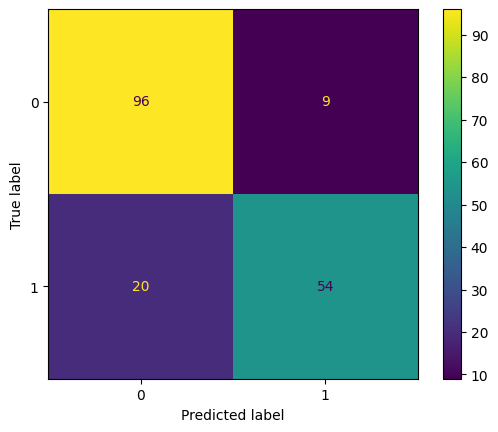

In [63]:
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [64]:
print(classification_report(ytest,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



# ROC curve-Receiver Operator Characterstics

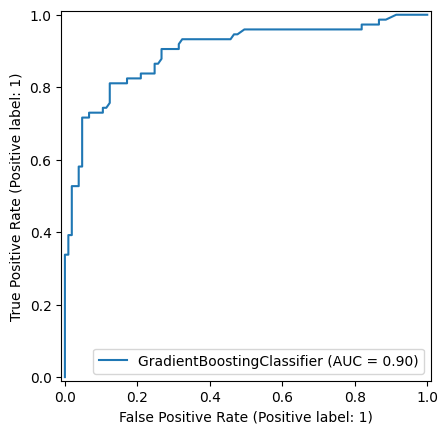

In [65]:
RocCurveDisplay.from_estimator(best_gbc,xtest,ytest)


# Final predtictions on testing set

In [66]:
url2 = r'https://raw.githubusercontent.com/Sid-2862/Titanic-ML-Competition-/refs/heads/main/test.csv'
xnew = pd.read_csv(url2)
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])])

In [68]:
xnew_pre = pre.fit_transform(xnew)
xnew_pre.head()

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare
0,0.0,1.0,0.0,1.0,0.0,0.873482,0.334993,-0.499470,-0.400248,-0.498407
1,1.0,0.0,0.0,0.0,1.0,0.873482,1.325530,0.616992,-0.400248,-0.513274
2,0.0,1.0,0.0,1.0,0.0,-0.315819,2.514175,-0.499470,-0.400248,-0.465088
3,0.0,1.0,0.0,0.0,1.0,0.873482,-0.259330,-0.499470,-0.400248,-0.483466
4,1.0,0.0,0.0,0.0,1.0,0.873482,-0.655545,0.616992,0.619896,-0.418471


In [70]:
final_preds = best_gbc.predict(xnew_pre)
final_preds[:5]

array([0, 0, 0, 0, 1])

In [71]:
xnew["Survived_Predictions"]= final_preds
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Predictions
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [72]:
Submission = xnew[["PassengerId"]]
Submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [73]:
Submission["Survived"] = final_preds
Submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
Submission.to_csv("Titanic Survived Predictions.csv",index=False)